# Introducción a la Estadística Bayesiana

Juan Sosa PhD

Email:   jcsosam@unal.edu.co

GitHub:  https://github.com/jstats1702 

# Ejemplo de motivación

Se quiere estimar la **prevalencia de una enfermedad** $\theta$ (proporción de la población que padece la enfermedad) de una ciudad.

El **espacio de parámetros** (conjunto de posibles valores del parámetro) es $\Theta = (0,1)$.

Se examina una muestra aleatoria de $n=20$ individuos para observar el **número de personas infectadas en la muestra** $y$.

El **espacio de observaciones** (conjunto de posibles conjuntos de datos) es $\mathcal{Y} = \{0,\ldots,n\}$.

# Distribución muestral

La **distribución muestral** (*sampling distribution*) $p(y\mid\theta)$ es el mecanismo aleatorio que especifica cómo se genera $y$ dado un valor específico de $\theta$.

## Ejemplo

**Antes** de realizar el proceso de observación, $y$ es una **variable aleatoria** tal que 
$$
y\mid\theta\sim\textsf{Bin}(n,\theta)
\qquad\Longleftrightarrow\qquad
p(y\mid\theta) = \binom{n}{y}\theta^y(1-\theta)^{n-y}
$$

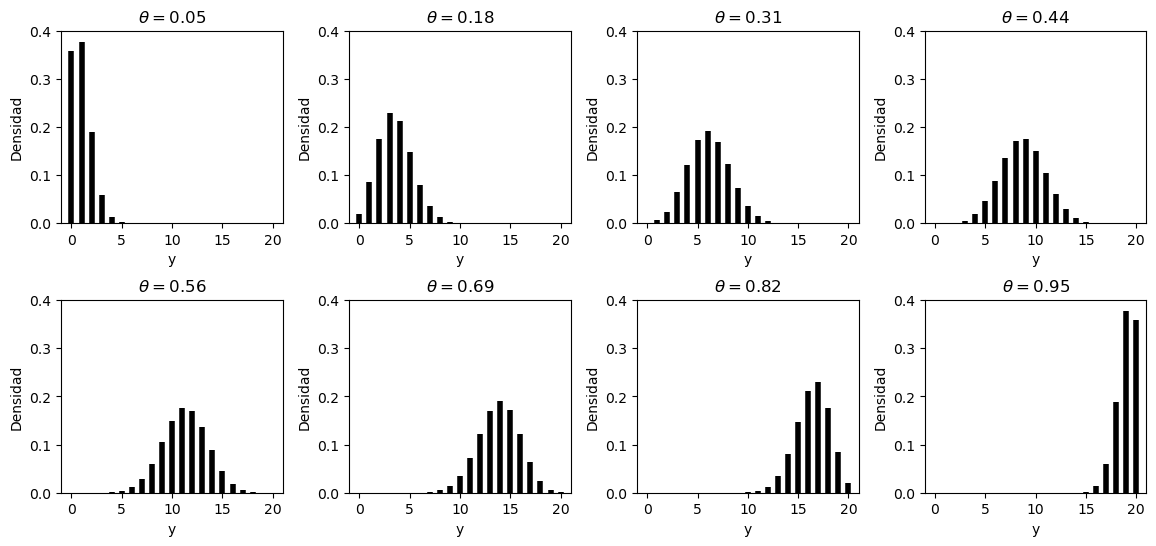

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

n = 20
m = 8
theta = np.linspace(0.05, 0.95, m)

fig, axes = plt.subplots(2, 4, figsize=(14, 6))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

for i, ax in enumerate(axes.flatten()):
    x = np.arange(0, n + 1)
    y = binom.pmf(x, n, theta[i])
    ax.vlines(x, 0, y, colors="black", linewidth=4)
    ax.set_xlabel("y")
    ax.set_ylabel("Densidad")
    ax.set_ylim(0, 0.4)
    ax.set_title(r"$\theta = {:.2f}$".format(theta[i]))

plt.show()

# Distribución previa

La **distribución previa** (*prior distribution*) $p(\theta)$ es el mecanismo aleatorio que especifica el estado de información acerca de $\theta$ externo al conjunto de datos $y$.

$\theta$ es una **variable aleatoria**.

La formulación de $p(\theta)$ es fundamental, a partir de otros estudios o de la opinión de expertos, por ejemplo. 

Se acostumbra a usar distribuciones con una forma matemática conveniente.

Se recomienda emplear distribuciones **difusas** (distribuciones aproximadamente uniformes en el espacio de parámetros) cuando no se dispone de información previa acerca de $\theta$.

## Ejemplo (cont.)

Se representa el estado de información previo acerca de $\theta$ por medio de la familia de distribuciones Beta:
$$
\theta\sim\textsf{Beta}(a,b)
\qquad\Longleftrightarrow\qquad
p(\theta) = \frac{\Gamma(a+b)}{\Gamma(a)\,\Gamma(b)}\,\theta^{a-1}(1-\theta)^{b-1}
$$
donde $a$ y $b$ son cantidades fijas conocidas que se conocen como **hiperparámetros** (*hyperparameters*).

Usando $a=b=1$ se tiene que $p(\theta) = 1$ para todo $0<\theta<1$, i.e., no se favorece ningún valor de $\theta$ a priori. 

# Distribución posterior

La **distribución posterior** (*posterior distribution*) $p(\theta\mid y)$ es el mecanismo aleatorio que especifica el estado de información actualizado acerca de $\theta$ después de observar $y$.

**Después** de realizar el proceso de observación, $y$ es una **cantidad fija**.

La **inferencia estadística** consiste en **aprender** (disminuir la incertidumbre) acerca de los **parámetros** (características) $\boldsymbol{\theta}=(\theta_1,\ldots,\theta_k)$ de una **población** (proceso generativo) a partir de una **fuente de información** (conjunto de datos) $\boldsymbol{y}=(y_1,\ldots,y_n)$.

El **teorema de Bayes** es el método racional óptimo que garantiza la coherencia y consistencia lógica para actualizar el estado de información acerca de $\boldsymbol{\theta}$ de acuerdo con la evidencia empírica contenida en $\boldsymbol{y}$:
$$
p(\boldsymbol{\theta}\mid \boldsymbol{y}) = \frac{p(\boldsymbol{\theta},\boldsymbol{y})}{p(\boldsymbol{y})} = \frac{p(\boldsymbol{y}\mid\boldsymbol{\theta})\,p(\boldsymbol{\theta})}{\int_\Theta p(\boldsymbol{y}\mid\boldsymbol{\theta})\,p(\boldsymbol{\theta})\,\text{d}\boldsymbol{\theta}}\propto p(\boldsymbol{y}\mid\boldsymbol{\theta})\,p(\boldsymbol{\theta}).
$$

La distribución posterior $p(\boldsymbol{\theta}\mid\boldsymbol{y})$ es función de $\boldsymbol{\theta}$ una vez que se observa $\boldsymbol{y}$. 

El proceso de aprendizaje inductivo mediante el teorema de Bayes se conoce como **inferencia Bayesiana**.

El teorema de Bayes no determina nuestro estado de información, sino cómo debe actualizarse al incorporar nueva evidencia.

R. A. Fisher popularizó esta idea y la llamó **función de verosimilitud**, 
$$
\ell(\boldsymbol{\theta}) = c\,p(\boldsymbol{y}\mid\boldsymbol{\theta}),
$$ 
donde $c$ es una constante positiva arbitraria.

La **distribución marginal** (*marginal distribution*) de $\boldsymbol{y}$ dada por
$$
p(\boldsymbol{y}) = \int_\Theta p(\boldsymbol{y}\mid\boldsymbol{\theta})\,p(\boldsymbol{\theta})\,\text{d}\boldsymbol{\theta}
$$ 
es un promedio ponderado (mezcla) de distribuciones muestrales de $\boldsymbol{y}$ dado $\boldsymbol{\theta}$, ponderadas por la distribución previa $p(\boldsymbol{\theta})$. 

$p(\boldsymbol{y})$ es una cantidad constante respecto a $\boldsymbol{\theta}$ que permite **normalizar** la distribución posterior $p(\boldsymbol{\theta}\mid \boldsymbol{y})$.
	
El teorema de Bayes se puede escribir como
$$
p(\boldsymbol{\theta}\mid \boldsymbol{y}) \propto \ell(\boldsymbol{\theta}\mid\boldsymbol{y})\,p(\boldsymbol{\theta})
\qquad
\Longleftrightarrow
\qquad
\log p(\boldsymbol{\theta}\mid \boldsymbol{y}) = \log \ell(\boldsymbol{\theta}\mid\boldsymbol{y}) + \log p(\boldsymbol{\theta}) + c
$$
donde $c$ es una constante positiva.

## Ejemplo

Considere el modelo:
$$
\begin{align*}
y\mid\theta &\sim \textsf{Binomial}(n,\theta)\\
\theta      &\sim \textsf{Beta}(a,b)
\end{align*}
$$
donde $y\in\mathcal{Y}=\{1,\ldots,n\}$, $\theta\in\Theta=(0,1)$ y $a = b = 1$.

Bajo este modelo la **distribución posterior** de $\theta$ es
$$
\theta\mid y\sim\textsf{Beta}(a+y,b+n-y)
\qquad\Longleftrightarrow\qquad
p(\theta\mid y) = \frac{\Gamma(a+b+n)}{\Gamma(a+y)\,\Gamma(b+n-y)}\,\theta^{a+y-1}(1-\theta)^{b+n-y-1}
$$
dado que
$$
\begin{align*}
p(\theta\mid y) &\propto p(y\mid\theta)\,p(\theta) \\
&= \binom{n}{y}\theta^y(1-\theta)^{n-y} \cdot \frac{\Gamma(a+b)}{\Gamma(a)\,\Gamma(b)}\,\theta^{a-1}(1-\theta)^{b-1} \\
&\propto \theta^{a+y-1}(1-\theta)^{b+n-y-1} \\
\end{align*}
$$
lo que corresponde al **núcleo** (*kernel*; función de densidad sin la constante de normalización) de una distribución Beta con parámetros $a_n = a+y$ y $b_n = b+n-y$.

Si se observa que un solo individuo de la muestra está infectado ($y=1$), entonces la distribución posterior de $\theta$ es $\theta\mid y \sim \textsf{Beta}(2,20)$.


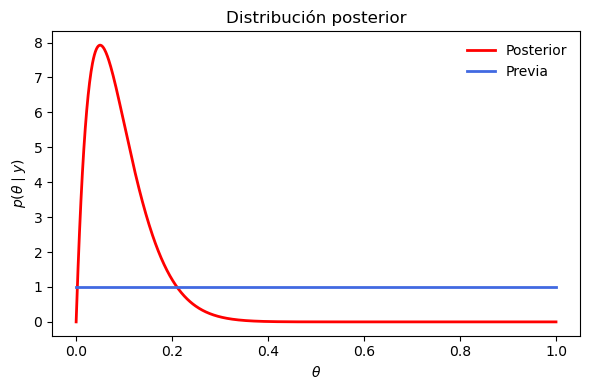

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Parámetros
a = 1
b = 1
n = 20
y = 1

# Dominio
x = np.linspace(0, 1, 1000)

# Densidades
posterior = beta.pdf(x, a + y, b + n - y)
prior = beta.pdf(x, a, b)

# Gráfico
plt.figure(figsize=(6, 4))
plt.plot(x, posterior, color='red', label='Posterior', linewidth=2)
plt.plot(x, prior, color='royalblue', label='Previa', linewidth=2)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta \mid y)$')
plt.title('Distribución posterior')
plt.legend(loc='upper right', frameon=False)
plt.grid(False)
plt.tight_layout()
plt.show()


La distribución posterior $p(\theta \mid y)$ proporciona un marco para inferir y actualizar el conocimiento sobre $\theta$.

La distribución posterior es más concentrada que $p(\theta)$ porque combina la información de los datos con la distribución previa, por lo que contiene más información que $p(\theta)$ por sí sola.

La distribución posterior permite cuantificar cualquier característica de $\theta$ incorporando la evidencia proporcionada por los datos, por ejemplo:

- Tendencia central:
$$
\textsf{E}(\theta\mid\ y) = \int_\Theta \theta \,p(\theta\mid y)\,\text{d}\theta = \frac{a_n}{a_n+b_n} = 0.0909.
$$
- Variabilidad:
$$
\textsf{Var}(\theta\mid\ y) = \int_\Theta (\theta - \textsf{E}(\theta\mid\ y))^2\,p(\theta\mid y)\,\text{d}\theta = \frac{a_n\,b_n}{(a_n+b_n)^2(a_n+b_n+1)} = 0.0036.
$$

- Probabilidad:
$$
\textsf{P}(\theta < 0.1\mid y) = \int_0^{0.1} p(\theta\mid y)\,\text{d}\theta = 0.283.
$$

- Intervalo de credibilidad al 95%:
$$
(\theta\mid y)_{0.025} = 0.0117 \quad\text{y}\quad (\theta\mid y)_{0.975} = 0.6353.
$$

Es recomendable calcular la distribución posterior para una amplia gama de valores de los hiperparámetros con el propósito de llevar a cabo un **análisis de sensibilidad**, permitiendo evaluar la influencia de distintas especificaciones previas en los resultados inferenciales. 

## Ejemplo

Una estimación clásica de $\theta$ es la proporción muestral de personas infectadas $\bar{y} = y/n$.

Si $y = 1$, la estimación resulta en $\bar{y} = 1/20 = 0.05$. 

Una manera habitual de cuantificar la incertidumbre de una estimación es a través de un **intervalo de confianza**. 

Un intervalo de confianza del 95% ampliamente utilizado para una proporción poblacional $\theta$ es:
$$
\bar{y} \pm 1.96 \sqrt{\frac{\bar{y}(1 - \bar{y})}{n}} = 0.05 \pm 0.0955.
$$

Este intervalo posee una cobertura frecuentista asintóticamente correcta; sin embargo, esta propiedad no se conserva en muestras pequeñas. 

# Probabilidad

La **probabilidad** es una rama de las Matemáticas que se dedica a la **cuantificación de la incertidumbre**.

## Frecuentista 

La asignación de probabilidades se restringe a fenómenos **repetibles** bajo condiciones idénticas.

Se define $\textsf{P}(A)$ como la **frecuencia relativa en el límite** asociada con la ocurrencia del evento $A$.

Solo se aplica a eventos intrínsecamente repetibles.

La probabilidad se entiende como una propiedad del fenómeno que se estudia.

## Bayesiana

No es posible asignar probabilidades sin hacer supuestos que dependan del **estado de información**.

Se define $\textsf{P}(A\mid\mathcal{B})$ como la **plausibilidad** (*degree of belief*; evidencia o cantidad de información) a favor del estatus verdadero del evento $A$, condicional en la información contenida en $\mathcal{B}$.

Todas las formas de incertidumbre son cuantificables.

La probabilidad se refiere a estados mentales sobre el mundo y no al mundo per se.

La inferencia Bayesiana es **subjetiva** porque depende del estado de información del analista, pero también requiere juicio científico para especificar la verosimilitud.

Las probabilidades permiten representar cuantitativamente un conjunto de creencias racionales, estableciendo así una relación entre la probabilidad y la información.

# Ejercicios conceptuales

- Suponga que, dado $ \theta = i $, la variable $ y $ sigue una distribución normal con media $ i $ y desviación estándar $ \sigma $, para $ i = 1,2 $. Además, suponga que $ \textsf{Pr}(\theta = 1) = \textsf{Pr}(\theta = 2) = 0.5 $.  

     a. Derive una expresión general para la densidad marginal $ p(y) $ y represéntela gráficamente para $ \sigma = 2 $.  
     b. Calcule $ \textsf{Pr}(\theta = 1 \mid y = 1) $ y $ \textsf{Pr}(\theta = 2 \mid y = 1) $ para $ \sigma = 2 $.
   
- Considere dos urnas con diferentes proporciones de balotas de colores. La urna $ C $ contiene un $ 60\% $ de balotas verdes y un $ 40\% $ de balotas rojas, mientras que la urna $ S $ contiene un $ 40\% $ de balotas verdes y un $ 60\% $ de balotas rojas. Se lanza una moneda para determinar de qué urna se extraerá una balota: si la moneda cae cara, se selecciona de la urna $ C $, y si cae sello, se selecciona de la urna $ S $. Defina la variable $ x $ como $ x = 1 $ si la moneda cae cara y $ x = 0 $ si cae sello, y la variable $ y $ como $ y = 1 $ si la balota extraída es verde y $ y = 0 $ si es roja.  

     a. Calcule $ \textsf{Var}(y) $, $ \textsf{Var}(y \mid x = 0) $ y $ \textsf{Var}(y \mid x = 1) $.  
     b. Interpretando la varianza como una medida de incertidumbre, explique por qué una de estas varianzas es mayor que las otras. 
     
- Sea $ y \mid x \sim \textsf{Poisson}(\theta) $ y $ \theta \sim \textsf{Exp}(a) $. ¿Cuál es la distribución marginal de $ y $?

# Ejercicios prácticos

- Sea $ E $ el evento en el que un ciclista profesional seleccionado al azar ha utilizado una sustancia prohibida y $ F $ el evento en el que da positivo en la prueba de dicha sustancia. La prueba tiene baja sensibilidad y alta especificidad, lo que significa que $ \textsf{Pr}(F \mid E) = 0.64 $ y $ \textsf{Pr}(F^C \mid E^C) = 0.95 $. Suponga que el 23% de los ciclistas usan la sustancia prohibida, es decir, $ \textsf{Pr}(E) = 0.23 $, y que un atleta seleccionado al azar da positivo en la prueba. ¿Cuál es la probabilidad de que realmente haya utilizado la sustancia? Además, represente gráficamente $ \textsf{Pr}(E \mid F) $ como función de $ \textsf{Pr}(E) $ mientras $ \textsf{Pr}(E) $ varía de 0 a 1.

- El número de partículas emitidas, $ Y $, por una muestra de roca depende de la cantidad desconocida $ \theta $ de material radiactivo en la muestra. Dado $ \theta $, el número de partículas sigue una distribución de Poisson. Se sabe que la roca pertenece a uno de tres tipos posibles: $ A $, $ B $ o $ C $, cada uno asociado con un valor específico de $ \theta $, es decir, $ \theta \in \{\theta_A, \theta_B, \theta_C\} $, donde $ \theta_A = 1.1 $, $ \theta_B = 3.2 $ y $ \theta_C = 4.5 $.  

     a. Represente gráficamente $ \textsf{Pr}(Y = y \mid \theta) $ en función de $ y $ para cada uno de los tres valores de $ \theta $, considerando un rango adecuado de valores de $ y $.  
     b. Suponga que la roca pertenece al tipo $ A $, $ B $ o $ C $ con probabilidades 0.4, 0.3 y 0.3, respectivamente. Grafique la probabilidad marginal $ \textsf{Pr}(Y = y) $ en función de $ y $ y compárela con las distribuciones individuales obtenidas en la parte a.  
     c. Si se observa $ y = 4 $, calcule la probabilidad posterior $ \textsf{Pr}(\theta = \theta_X \mid y = 4) $ para cada tipo de roca dado este valor observado. Compare estas probabilidades posteriores con las probabilidades previas (0.4, 0.3, 0.3) para evaluar cómo la observación de $ y = 4 $ modifica la información sobre el tipo de roca.
   
- En general, los estadísticos tienden a tener personalidades tímidas con mayor frecuencia que los economistas. Para cuantificar esta observación, suponga que el 80% de los estadísticos son tímidos, mientras que solo el 15% de los economistas presentan esta característica. En las conferencias de econometría, los asistentes suelen ser casi exclusivamente economistas y estadísticos, con una predominancia de economistas. Se modela esta situación asumiendo que el 90% de los participantes son economistas, mientras que el 10% restante son estadísticos.  

     a. Suponga que usted, como físico, asiste a una conferencia de econometría y entabla conversación con la primera persona que conoce al azar, descubriendo que esta persona es tímida. El objetivo es demostrar que la probabilidad condicional $ p $ de que esta persona sea estadística, dados estos datos y antecedentes, es aproximadamente del 37%. Defina las siguientes probabilidades: $ St $: "la persona es estadística", $ E $: "la persona es economista" y $ Sh $: "la persona es tímida". Muestre que la razón de probabilidades condicionales satisface la siguiente relación:  
     $$
     \frac{ \textsf{Pr}(St \mid Sh) }{ \textsf{Pr}(E \mid Sh) } = \frac{ \textsf{Pr}(St) }{ \textsf{Pr}(E) } \cdot \frac{ \textsf{Pr}(Sh \mid St) }{ \textsf{Pr}(Sh \mid E) }\,.
     $$  

     b. Demuestre que la razón de probabilidades posterior $ o $ a favor de $ St $ sobre $ E $, dados los datos observados, es $ o = \frac{16}{27} \approx 0.593 $.  
     c. Muestre que la probabilidad buscada es $ p = \frac{o}{1 + o} = \frac{16}{43} \approx 0.372 $.  
     d. Alguien argumenta: "Esta probabilidad no puede ser correcta; el 80% de los estadísticos son tímidos, mientras que solo el 15% de los economistas lo son. Por lo tanto, la probabilidad de que esté hablando con un estadístico debería ser superior al 50%". Explique por qué este razonamiento es incorrecto y por qué $ p $ debería ser menor del 50%.

- Suponga que un paciente nuevo acude a usted, un médico, en 1986 para realizarse la prueba del VIH. En esa época, la prueba de detección estándar utilizada era el ensayo inmunoabsorbente ligado a enzimas (ELISA, *Enzyme-Linked ImmunoSorbent Assay*). Defina $ B $ como el evento "el paciente es VIH positivo" y $ A $ como el evento "ELISA indica que el paciente es VIH positivo". La prevalencia del VIH en personas similares a este paciente en 1986 era $ p = 0.01 $, y la prueba ELISA tenía una sensibilidad de $ \epsilon = 0.95 $ (probabilidad de que la prueba identifique correctamente a una persona con VIH) y una especificidad de $ \pi = 0.98 $ (probabilidad de que la prueba identifique correctamente a una persona sin VIH).  

     a. Escriba expresiones explícitas en términos de $ p $, $ \epsilon $ y $ \pi $ para el valor predictivo positivo (PPV, *positive predictive value*), es decir, $ \textsf{Pr}(B \mid A) $, y el valor predictivo negativo (NPV, *negative predictive value*), es decir, $ \textsf{Pr}(B^\text{c} \mid A^\text{c}) $.  
     b. Manteniendo $ \epsilon $ y $ \pi $ constantes, obtenga expresiones del PPV y el NPV como funciones de $ p $. Grafique estas funciones para $ 0 < p < 0.1 $. ¿Qué tan grande tendría que ser $ p $ para que el PPV exceda 0.5 y 0.75? ¿Cuál sería el NPV para esos valores de $ p $?  
     c. Demuestre que el NPV se aproxima a 1 a medida que $ \epsilon $ tiende a 1 manteniendo $ \pi = 0.98 $, pero el PPV no puede superar 0.33557. De manera similar, muestre que el PPV se aproxima a 0.76183 a medida que $ \pi $ se acerca a 0.997 con $ \epsilon = 0.95 $.
     
- En el contexto del ejemplo motivacional sobre la prevalencia de una enfermedad, considere las siguientes distribuciones previas para $ \theta $: $ \theta \sim \textsf{Beta}(2,20) $, $ \theta \sim \textsf{Beta}(1,1) $ y $ \theta \sim \textsf{Beta}(1/2,1/2) $.  

     a. Represente gráficamente la distribución previa junto con la distribución posterior en cada caso.  
     b. Calcule $ \textsf{Pr}(0.05 < \theta < 0.2 \mid y) $ y $ \textsf{E}(\theta \mid y) $ para cada distribución previa.  
     c. Compare los resultados obtenidos y analice las diferencias en la influencia de la elección de la distribución previa.

# Ejercicios de probabilidad

- Considere la siguiente distribución conjunta de categorías ocupacionales de padres e hijos:

     | Ocupación del padre / Ocupación del hijo | **Agricultura** | **Operarios** | **Artesanos** | **Ventas** | **Profesionales** |
     |:-----------------------------------------|:---------------:|:-------------:|:-------------:|:----------:|:-----------------:|
     | **Agricultura**   | 0.018 | 0.035 | 0.031 | 0.008 | 0.018 |
     | **Operarios**     | 0.002 | 0.112 | 0.064 | 0.032 | 0.069 |
     | **Artesanos**     | 0.001 | 0.066 | 0.094 | 0.032 | 0.084 |
     | **Ventas**        | 0.001 | 0.018 | 0.019 | 0.010 | 0.051 |
     | **Profesionales** | 0.001 | 0.029 | 0.032 | 0.043 | 0.130 |

     Esta tabla representa la probabilidad conjunta de cada combinación de ocupación entre padres e hijos. Utilizando esta distribución conjunta, calcule lo siguiente:  

     a. La distribución de probabilidad marginal de la ocupación del padre.  
     b. La distribución de probabilidad marginal de la ocupación del hijo.  
     c. La distribución de probabilidad condicional de la ocupación del hijo, dado que el padre es agricultor.  
     d. La distribución de probabilidad condicional de la ocupación del padre, dado que el hijo es agricultor.

- Sea $ X \sim \textsf{Exp}(\lambda) $, donde $ \textsf{E}(X) = 1 / \lambda $. ¿Cuál es la función de masa de probabilidad de $ Y = \lfloor X \rfloor $ (el mayor entero menor o igual que $ X $)?

- Sea $ Y = \frac{1}{X} $, donde $ X $ es una variable aleatoria con distribución Gamma con parámetros $ a $ y $ b $, de manera que $ \textsf{E}(X) = \frac{a}{b} $.

     a. Encuentre la función de densidad de $ Y $.  
     b. Calcule $ \textsf{E}(Y^k) $. ¿Es necesario imponer alguna restricción para que este valor esperado exista?  
     c. Compare $ \textsf{E}(Y^k) $ con $ 1/\textsf{E}(X^k) $ analizando la razón entre ambas cantidades.
     
- $ Y = \exp(X) $, donde $ X $ es una variable aleatoria con distribución normal de media $ \mu $ y varianza $ \sigma^2 $.

     a. Encuentre la función de densidad de $ Y $.  
     b. Calcule la media y la varianza de $ Y $.

- Demuestre que si $ X \sim \textsf{Exp}(\lambda) $, entonces:  

     a. $ Y = X^{1/\gamma} $ sigue una distribución Weibull, donde $ \gamma > 0 $.  
     b. $ Y = (2X / \gamma)^{1/2} $ sigue una distribución Rayleigh, donde $ \gamma > 0 $.  

     En ambos casos, encuentre la función de densidad de $ Y $ y calcule la media y la varianza.

- Sea $ X $ una variable aleatoria con distribución uniforme en el intervalo $ (0, 1) $. Determine la distribución de $ Y = g(X) = \sqrt{X} $.

- Sea $ X_1 $ y $ X_2 $ dos variables aleatorias independientes tales que $ X_i \sim \textsf{Gamma}(a_i, b) $ para cualquier $ a_1, a_2, b > 0 $. Defina $ Y = \frac{X_1}{X_1 + X_2} $ y $ Z = X_1 + X_2 $.

     a. Determine la función de densidad conjunta de $ Y $ y $ Z $, y demuestre que estas dos variables aleatorias son independientes.  
     b. Determine la función de densidad marginal de $ Y $.  
     c. Determine la función de densidad marginal de $ Z $.  
     d. Calcule $ \textsf{E}(Y^k) $ para cualquier $ k > 0 $.  
     e. ¿Qué implica este resultado cuando $ a_i = b_i = 1 $?

- Sean $ X_1 $ y $ X_2 $ dos variables aleatorias independientes con distribución normal estándar. Determine la distribución conjunta de $ Y_1 = X_1 + X_2 $ y $ Y_2 = X_1 - X_2 $.

- Considere tres variables aleatorias independientes $ X_1, X_2, X_3 $ tales que $ X_i \sim \textsf{Gamma}(a_i, b) $. Defina el vector $ \boldsymbol{Y} = (Y_1, Y_2, Y_3) $ como:  
$$
\boldsymbol{Y} = \left( \frac{X_1}{X_1 + X_2 + X_3}, \frac{X_2}{X_1 + X_2 + X_3}, \frac{X_3}{X_1 + X_2 + X_3} \right).
$$

     a. Demuestre que $ \boldsymbol{Y} \sim \textsf{Dirichlet}(a_1, a_2, a_3) $.  
     b. Escriba una función en R o Python que tome como entrada $ n $, el número de vectores trivariados a generar, y $ (a_1, a_2, a_3) $, y que devuelva una matriz de tamaño $ n \times 3 $, donde cada fila corresponda a una muestra independiente de una distribución de Dirichlet con parámetro $ (a_1, a_2, a_3) $.
     
- Sea $ Y_1 $ y $ Y_2 $ dos variables aleatorias independientes con $ \textsf{E}(Y_i) = \mu_i $ y $ \textsf{Var}(Y_i) = \sigma_i^2 $. Utilizando la definición de valor esperado y varianza, calcule las siguientes cantidades, donde $ a_1 $ y $ a_2 $ son constantes dadas:  

     a. $ \textsf{E}[a_1 Y_1 + a_2 Y_2] $ y $ \textsf{Var}[a_1 Y_1 + a_2 Y_2] $.  
     b. $ \textsf{E}[a_1 Y_1 - a_2 Y_2] $ y $ \textsf{Var}[a_1 Y_1 - a_2 Y_2] $.     
     
- Sea $ X $ una variable aleatoria con valor esperado $ \textsf{E}(X) $ y sea $ Y $ cualquier variable aleatoria definida en el mismo espacio de probabilidad. Mostrar que
$$
\textsf{E}(X) = \textsf{E}(\textsf{E}(X \mid Y))\,.
$$

- Sea $ X $ una variable aleatoria con varianza $ \textsf{Var}(X) $ y sea $ Y $ cualquier variable aleatoria definida en el mismo espacio de probabilidad. Mostrar que
$$
\textsf{Var}(X) = \textsf{E}(\textsf{Var}(X \mid Y)) + \textsf{Var}(\textsf{E}(X \mid Y))\,.
$$

# Referencias

Hoff, P. D. (2009). *A First Course in Bayesian Statistical Methods*. Springer New York.

Gelman, A., Carlin, J. B., Stern, H. S., Dunson, D. B., Vehtari, A., & Rubin, D. B. (2013). *Bayesian Data Analysis* (3rd ed.). Chapman & Hall/CRC.